<a href="https://colab.research.google.com/github/sarahnolan15/APA-Project-/blob/main/APA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Upload the Dataset

In [250]:
import pandas as pd
  
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Exploratory Data Analysis

In [251]:
#find the shape
df.shape

(918, 12)

In [252]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [253]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [254]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [256]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

# Seperating Model Features and Model Types

In [257]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [258]:
model_features = df.columns.drop('HeartDisease')
model_target = 'HeartDisease'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')
Model target:  HeartDisease


In [259]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')

Categorical columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


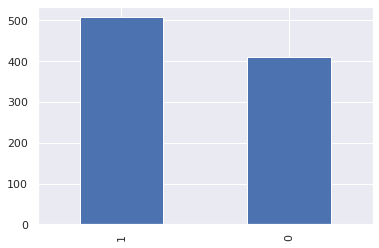

In [260]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

Age


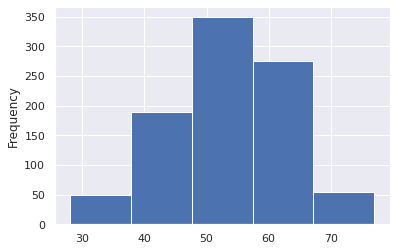

RestingBP


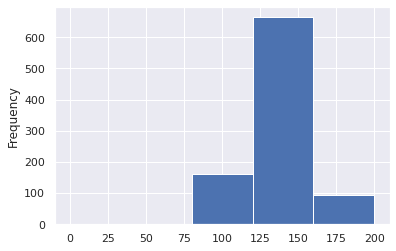

Cholesterol


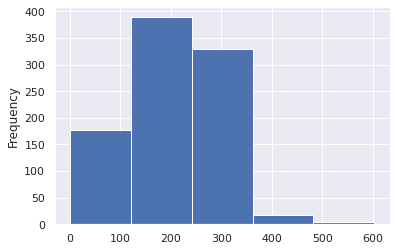

FastingBS


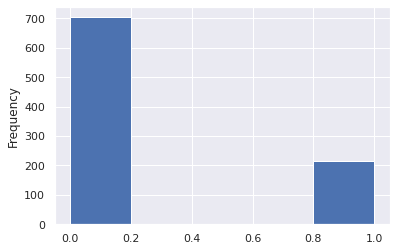

MaxHR


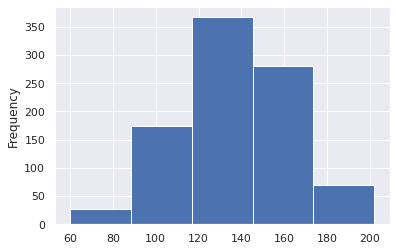

Oldpeak


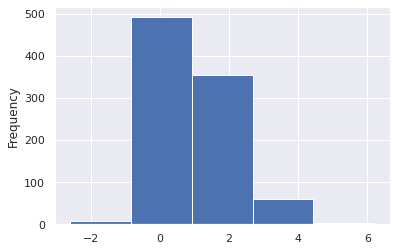

In [261]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

In [262]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Age
min: 28 max: 77
RestingBP
min: 0 max: 200
Cholesterol
min: 0 max: 603
FastingBS
min: 0 max: 1
MaxHR
min: 60 max: 202
Oldpeak
min: -2.6 max: 6.2


In [263]:
for c in numerical_features_all: 
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age
(27.95, 32.9]     12
(32.9, 37.8]      37
(37.8, 42.7]      86
(42.7, 47.6]     104
(47.6, 52.5]     148
(52.5, 57.4]     201
(57.4, 62.3]     175
(62.3, 67.2]     101
(67.2, 72.1]      39
(72.1, 77.0]      15
Name: Age, dtype: int64
RestingBP
(-0.201, 20.0]      1
(20.0, 40.0]        0
(40.0, 60.0]        0
(60.0, 80.0]        1
(80.0, 100.0]      26
(100.0, 120.0]    265
(120.0, 140.0]    405
(140.0, 160.0]    177
(160.0, 180.0]     35
(180.0, 200.0]      8
Name: RestingBP, dtype: int64
Cholesterol
(-0.604, 60.3]    172
(60.3, 120.6]       6
(120.6, 180.9]     70
(180.9, 241.2]    319
(241.2, 301.5]    248
(301.5, 361.8]     81
(361.8, 422.1]     14
(422.1, 482.4]      3
(482.4, 542.7]      3
(542.7, 603.0]      2
Name: Cholesterol, dtype: int64
FastingBS
(-0.002, 0.1]    704
(0.1, 0.2]         0
(0.2, 0.3]         0
(0.3, 0.4]         0
(0.4, 0.5]         0
(0.5, 0.6]         0
(0.6, 0.7]         0
(0.7, 0.8]         0
(0.8, 0.9]         0
(0.9, 1.0]       214
Name: FastingBS, d

# Check for Missing Data

In [264]:
print(df[numerical_features_all].isna().sum())

Age            0
RestingBP      0
Cholesterol    0
FastingBS      0
MaxHR          0
Oldpeak        0
dtype: int64


In [265]:
print(df[categorical_features_all].isna().sum())

Sex               0
ChestPainType     0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64


# Endode the Data to Numerical Data 


In [266]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']] = oe.fit_transform(df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0,1


In [267]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


# Train the Dataset

In [268]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=23)

# Target Balancing 

In [269]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

Training set shape: (826, 12)
Class 0 samples in the training set: 367
Class 1 samples in the training set: 459
Class 0 samples in the test set: 43
Class 1 samples in the test set: 49


In [270]:
from sklearn.utils import shuffle

class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [271]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))

Training set shape: (918, 12)
Class 1 samples in the training set: 459
Class 0 samples in the training set: 459


## Data Processing with Pipeline

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

### PIPELINE ###
################

# Pipeline desired data transformers, along with an estimator at the end
# For each step specify: a name, the actual transformer/estimator with its parameters
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

# Visualize the pipeline
# This will come in handy especially when building more complex pipelines, stringing together multiple preprocessing steps
from sklearn import set_config
set_config(display='diagram')
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

# Train the Classifier

In [273]:
# Get train data to train the classifier
X_train = train_data[numerical_features_all]
y_train = train_data[model_target]

# Fit the classifier to training data
# Train data going through the Pipeline it's first imputed, then scaled, and finally used to fit the estimator
classifier.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

# Test the Classifier

In [274]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Use the fitted model to make predictions on the train dataset
# Train data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
train_predictions = classifier.predict(X_train)

print('Model performance on the train set:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Model performance on the train set:
[[430  29]
 [ 68 391]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       459
           1       0.93      0.85      0.89       459

    accuracy                           0.89       918
   macro avg       0.90      0.89      0.89       918
weighted avg       0.90      0.89      0.89       918

Train accuracy: 0.8943355119825708


In [275]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# Get test data to test the classifier
X_test = test_data[numerical_features_all]
y_test = test_data[model_target]

# Use the fitted model to make predictions on the test dataset
# Test data going through the Pipeline it's first imputed (with means from the train), scaled (with the min/max from the train data), and finally used to make predictions
test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))

Model performance on the test set:
[[28 15]
 [13 36]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67        43
           1       0.71      0.73      0.72        49

    accuracy                           0.70        92
   macro avg       0.69      0.69      0.69        92
weighted avg       0.70      0.70      0.70        92

Test accuracy: 0.6956521739130435


# AFTER MILESTONE:

# Analysing the 'Sex' feature




In [276]:
df["Sex"].unique()

array([1., 0.])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


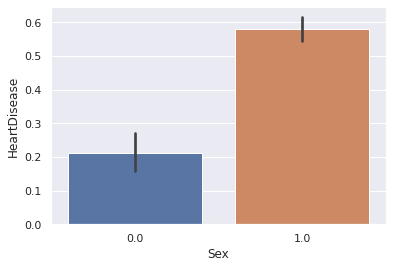

In [279]:
import seaborn as sns
sns.barplot(df["Sex"],y_train)
#males are more likely to get HD

## Analysing the 'Chest Pain Type' feature

In [280]:
df["ChestPainType"].unique()

array([1., 2., 0., 3.])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


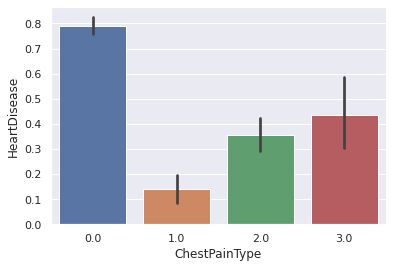

In [283]:
sns.barplot(df["ChestPainType"],y)

# Imports

In [284]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [285]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

# cross validation

# Decision Tree

In [286]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [287]:
X2 = df.drop(['HeartDisease'], axis=1)
y2 = df.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.5, random_state=0)

In [288]:
df.head(

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [364]:
classification_model = DecisionTreeClassifier(max_depth=4)
classification_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [365]:
print(classification_report(y_train, classification_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       209
           1       0.86      0.96      0.91       250

    accuracy                           0.90       459
   macro avg       0.90      0.89      0.89       459
weighted avg       0.90      0.90      0.89       459



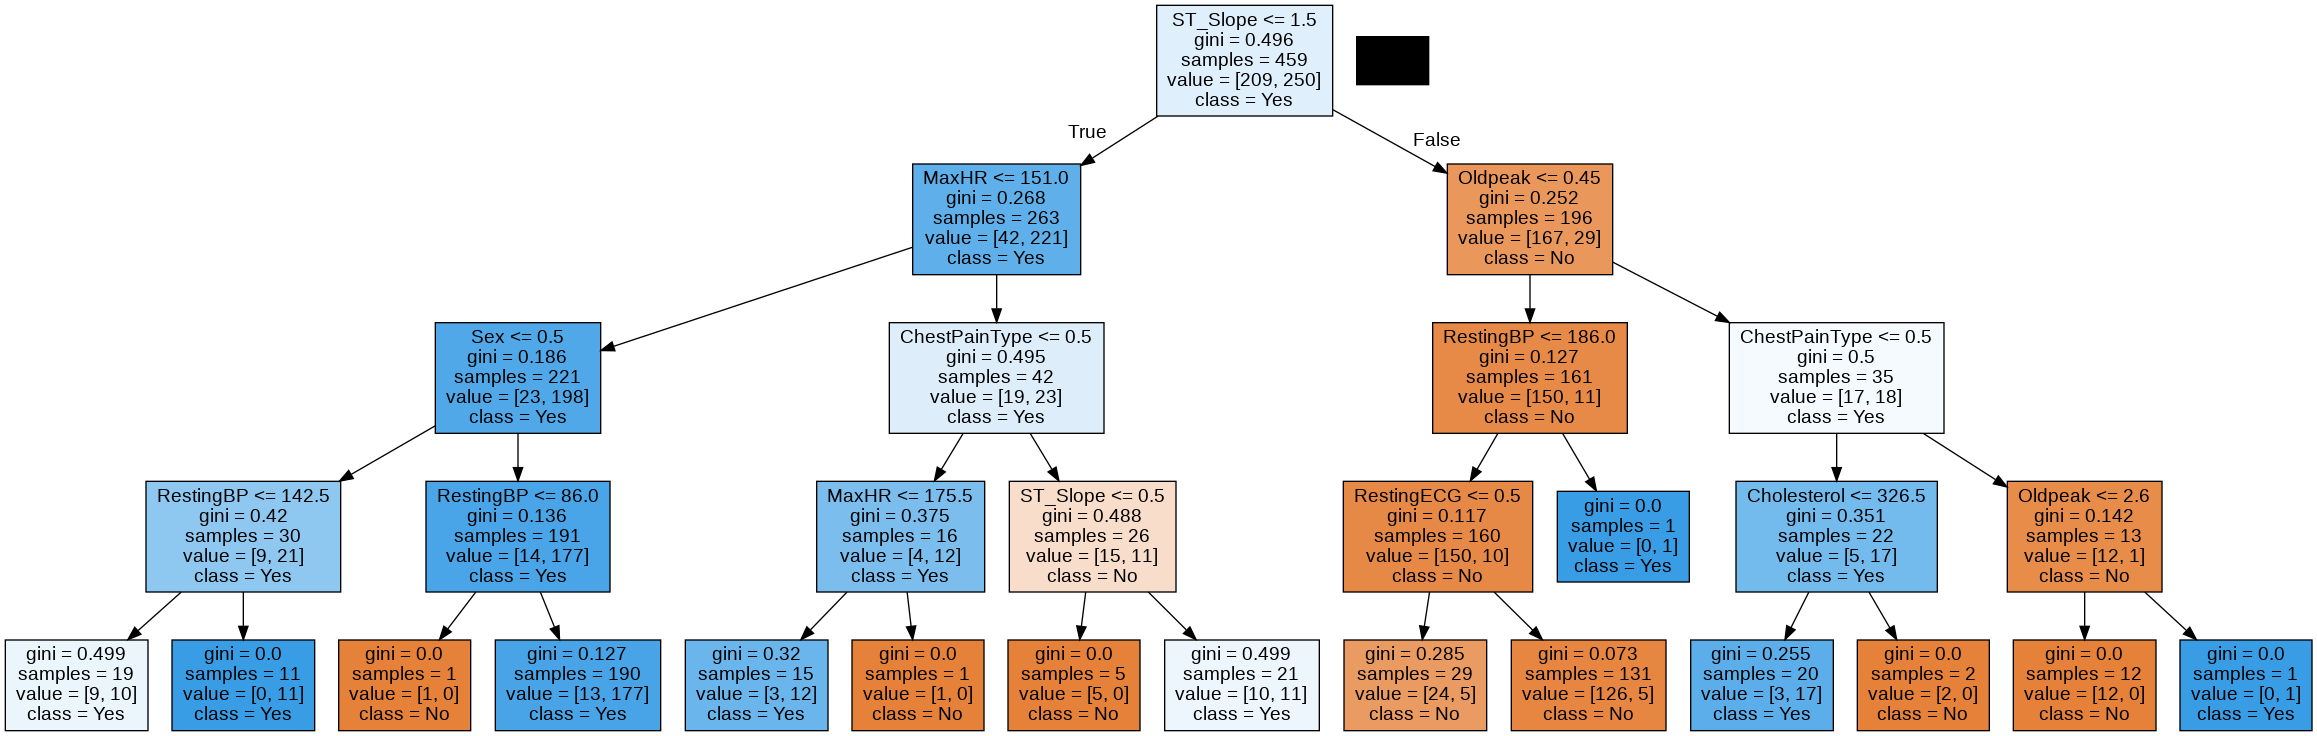

In [366]:
graph3, = print_tree(classification_model, features=X.columns, class_names=['No', 'Yes'])
Image(graph3.create_png())

In [296]:
classification_model.fit(X_train, y_train)
pred = classification_model.predict(X_test)

In [297]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,144,33
Yes,57,225


In [298]:
# Precision of the model using test data is 80%
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       201
           1       0.80      0.87      0.83       258

    accuracy                           0.80       459
   macro avg       0.81      0.79      0.80       459
weighted avg       0.80      0.80      0.80       459



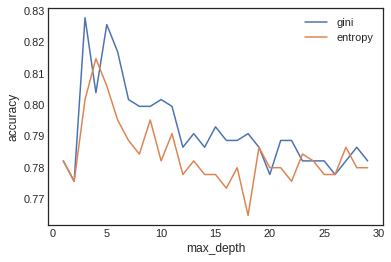

In [299]:
from sklearn.metrics import accuracy_score
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

# fitting regression trees

In [300]:
y1 = df.HeartDisease
X1 = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, random_state=0)

In [301]:
# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

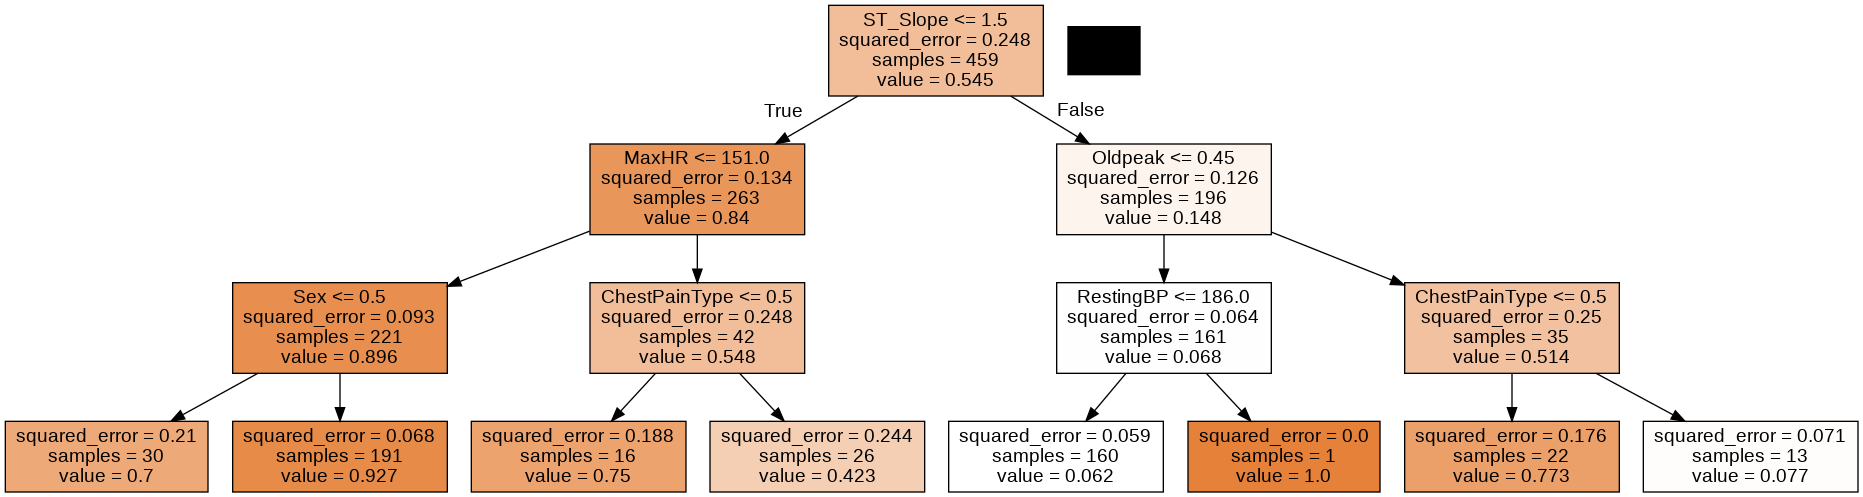

In [304]:
graph, = print_tree(regr2, features=X_test.columns)
Image(graph.create_png())

Text(0, 0.5, 'y_test')

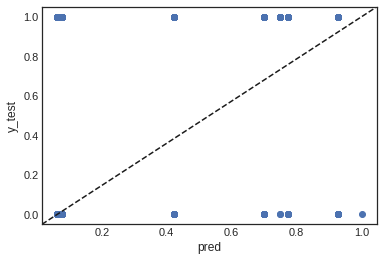

In [305]:
plt.scatter(pred, y_test, label='Heart Disease')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [306]:
mean_squared_error(y_test, pred)

0.1411973348492619

In [309]:
print(classification_report(y_test, classification_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       201
           1       0.80      0.87      0.83       258

    accuracy                           0.80       459
   macro avg       0.81      0.79      0.80       459
weighted avg       0.80      0.80      0.80       459



# Bagging and random forest

In [310]:
X.shape

(918, 10)

In [311]:
# Bagging: using all features
rf = RandomForestRegressor(max_features='sqrt', random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=1)

Text(0, 0.5, 'y_test')

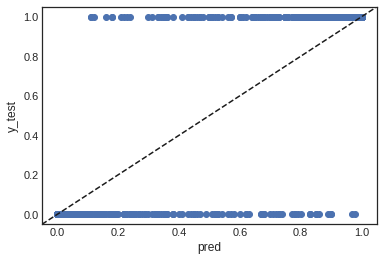

In [312]:
pred = rf.predict(X_test)
#pred_prob=rf.predict_proba(test)[:, 1]

plt.scatter(pred, y_test, label='Heart Disease')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [313]:
mean_squared_error(y_test, pred)

0.10682636165577342

In [314]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [315]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

0.11674727668845315

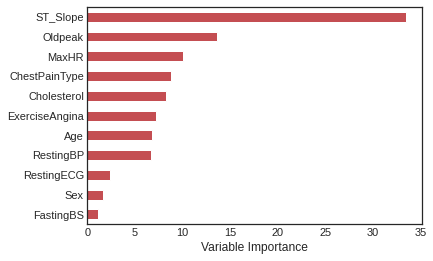

In [320]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [321]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


In [322]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 410, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py", line 156, in _validate_estimator
    if self.estimator is not None and (
AttributeError: 'RandomForestRegressor' ob

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=42, verbose=2)

In [124]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25,
 'bootstrap': False}

In [125]:
best_random = rf_random.best_estimator_
#grid_accuracy = eval(best_grid, X_test, y_test)
pred = best_random.predict(X_test)
mean_squared_error(y_test, pred)
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

0.10905862821229906

In [126]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [6,8,12],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2,4, 5],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [127]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'bootstrap': False,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [128]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=6, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

In [129]:
best_grid = grid_search.best_estimator_
pred = best_grid.predict(X_test)
mean_squared_error(y_test, pred)


0.10792316676489577

# boosting

In [323]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

FastingBS          0.414139
RestingECG         1.465438
Sex                2.108583
Age                2.404351
ExerciseAngina     3.186541
Cholesterol        3.815931
RestingBP          4.460156
MaxHR              5.901330
ChestPainType      7.606737
Oldpeak            9.328421
ST_Slope          59.308374
dtype: float64


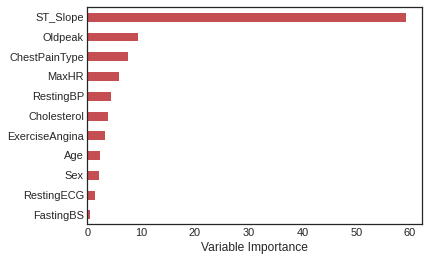

In [325]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X_train.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [326]:
mean_squared_error(y_test, regr.predict(X_test))

0.11881867676004425

In [327]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

XGBoost

In [135]:
!pip install numpy pandas matplotlib seaborn --quiet

In [136]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

     |████████████████████████████████| 68 kB 5.3 MB/s 
     |████████████████████████████████| 193.6 MB 32 kB/s 
     |████████████████████████████████| 47 kB 1.3 MB/s 
     |████████████████████████████████| 2.0 MB 10.5 MB/s 
     |████████████████████████████████| 9.7 MB 13.5 MB/s 


In [137]:
from xgboost import XGBRegressor,XGBClassifier

In [138]:
?XGBClassifier

In [139]:
model = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=2)

In [140]:
%%time
model.fit(X_train, y_train)

CPU times: user 103 ms, sys: 18.6 ms, total: 122 ms
Wall time: 230 ms


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [141]:
preds = model.predict(X_train)

In [142]:
preds

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [145]:
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       209
           1       0.89      0.94      0.92       250

    accuracy                           0.91       459
   macro avg       0.91      0.90      0.91       459
weighted avg       0.91      0.91      0.91       459



In [146]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       201
           1       0.86      0.87      0.87       258

    accuracy                           0.85       459
   macro avg       0.85      0.84      0.84       459
weighted avg       0.85      0.85      0.85       459



In [147]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

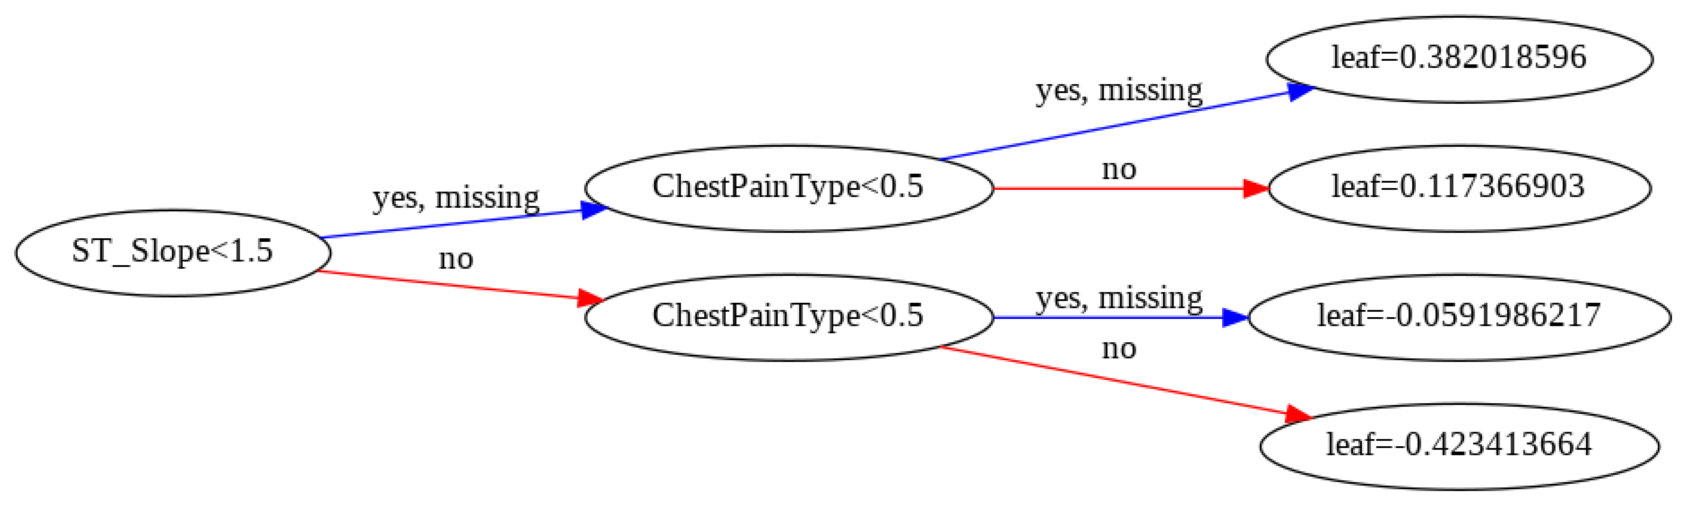

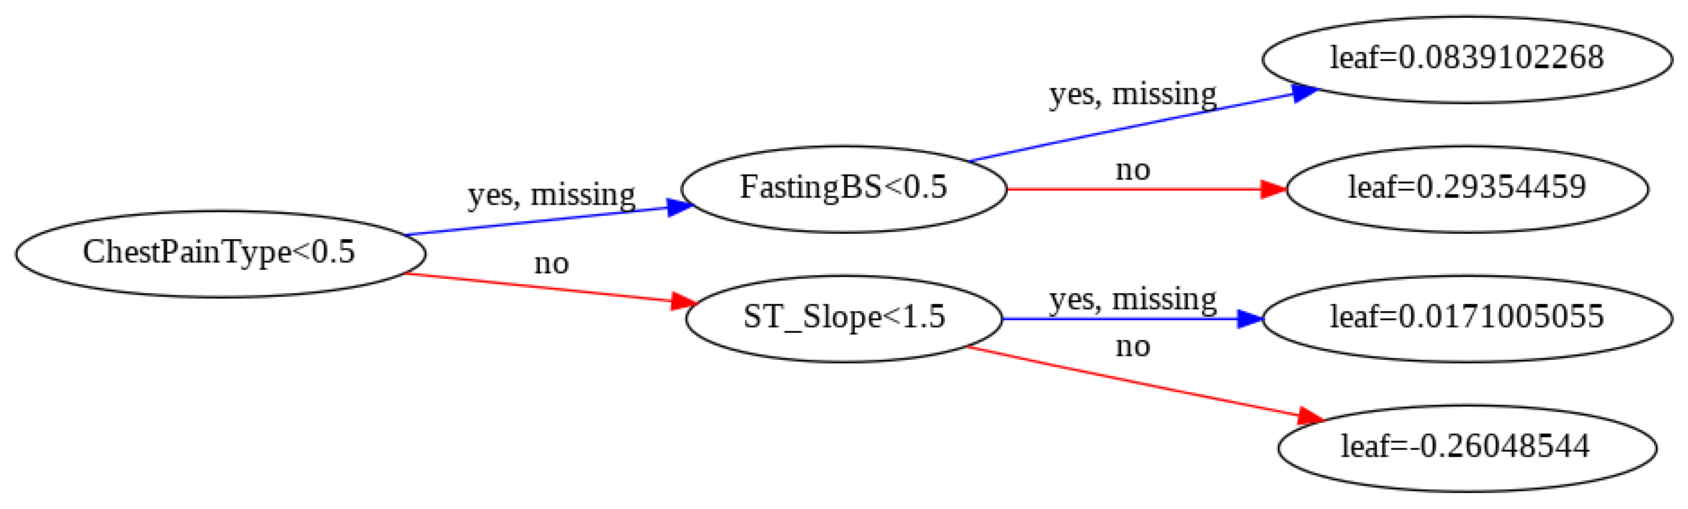

In [148]:
plot_tree(model, rankdir='LR', num_trees=1);
plot_tree(model, rankdir='LR', num_trees=5);

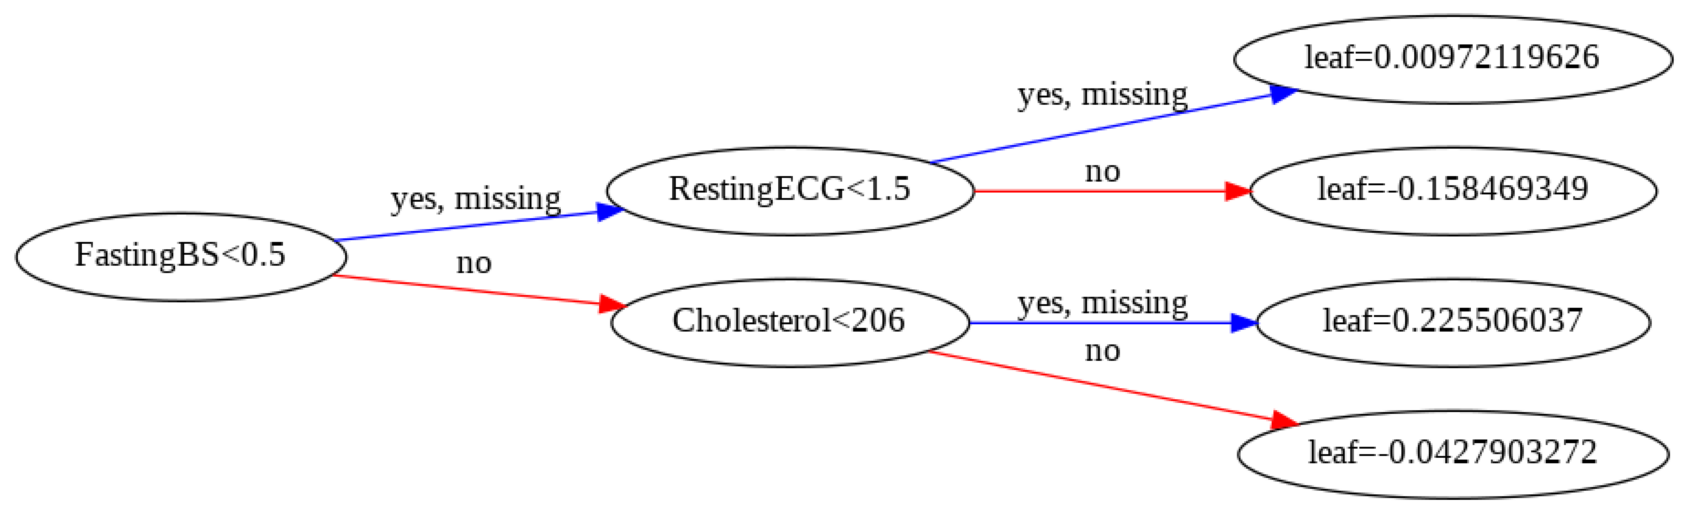

In [149]:
plot_tree(model, rankdir='LR', num_trees=19);

In [150]:
trees = model.get_booster().get_dump()

In [151]:
len(trees)

20

In [152]:
print(trees[0])

0:[ST_Slope<1.5] yes=1,no=2,missing=1
	1:[MaxHR<151] yes=3,no=4,missing=3
		3:leaf=0.466666698
		4:leaf=0.0521739163
	2:[Oldpeak<0.449999988] yes=5,no=6,missing=5
		5:leaf=-0.50545454
		6:leaf=0.0153846163



In [156]:
#feature importance
importance_df = pd.DataFrame({
    'feature': X_test.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [157]:
importance_df.head(10)

,feature,importance
10,ST_Slope,0.453150
8,ExerciseAngina,0.107838
2,ChestPainType,0.088442
7,MaxHR,0.086942
9,Oldpeak,0.083438
1,Sex,0.054260
3,RestingBP,0.035497
4,Cholesterol,0.033448
5,FastingBS,0.031884
6,RestingECG,0.025100


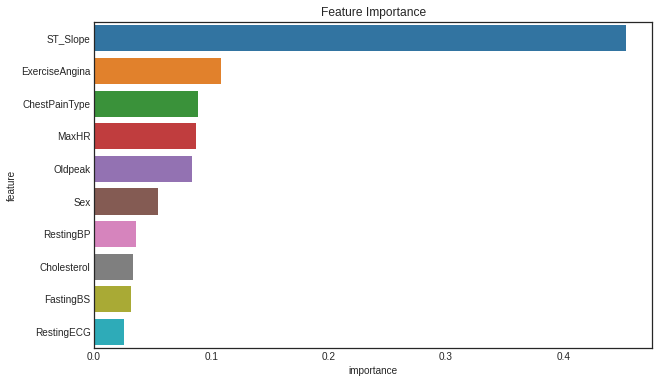

In [158]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# cross validation - k fold

In [159]:
from sklearn.model_selection import KFold

In [160]:
def rmse (yhat,yactual):
  from sklearn.metrics import mean_squared_error
  from math import sqrt
  return sqrt(mean_squared_error(yhat,yactual))

def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1,objective='reg:squarederror', **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [161]:
kfold = KFold(n_splits=10)

In [329]:
models = []
validations_rsme = []
trainings_rmse= []

for train_idxs, val_idxs in kfold.split(X_train):
    X_train, train_targets = X_train.iloc[train_idxs], y.iloc[train_idxs]
    X_val, val_targets = X_train.iloc[val_idxs], y_train.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    validations_rsme.append(val_rmse)
    trainings_rmse.append(train_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 0.33177653816347846, Validation RMSE: 0.5530312744695034


IndexError: ignored

In [330]:
from statistics import mean
mean(trainings_rmse),mean(validations_rsme)

(0.33177653816347846, 0.5530312744695034)

In [172]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [332]:
preds = predict_avg(models, X_test)

In [174]:
preds

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,

In [175]:
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [176]:
?XGBRegressor

In [177]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], y.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], y.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [178]:
from sklearn.model_selection import train_test_split

In [333]:
X_train, X_val, train_targets, val_targets = train_test_split(X, y, test_size=0.1)

In [334]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42,objective='reg:squarederror', **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [181]:
test_params(n_estimators=10)

Train RMSE: 0.23351085105920066, Validation RMSE: 0.6126162779863437


In [182]:
test_params(n_estimators=30)

Train RMSE: 0.06718357823273949, Validation RMSE: 0.7370339843142684


In [183]:
test_params(n_estimators=100)

Train RMSE: 0.0014830624566339145, Validation RMSE: 0.7742134273442256


In [184]:
test_params(n_estimators=240)

Train RMSE: 0.0014831090571660404, Validation RMSE: 0.7742132772912137


In [185]:
test_params(max_depth=2)

Train RMSE: 0.2907985046676838, Validation RMSE: 0.6405978164008134


In [186]:
test_params(max_depth=5)

Train RMSE: 0.009935175099944217, Validation RMSE: 0.7723273497704592


In [187]:
test_params(max_depth=10)

Train RMSE: 0.001290742960674731, Validation RMSE: 0.7742821839360978


In [188]:
test_params(n_estimators=50, learning_rate=0.01)

Train RMSE: 0.3963954942379373, Validation RMSE: 0.5345850397611278


In [189]:
test_params(n_estimators=50, learning_rate=0.1)

Train RMSE: 0.16067700039336086, Validation RMSE: 0.6796142808409589


In [190]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 0.02113966515827302, Validation RMSE: 0.7654642369036591


In [191]:
test_params(n_estimators=50, learning_rate=0.9)

Train RMSE: 0.0005979929176677943, Validation RMSE: 0.7747043757877402


In [192]:
test_params(n_estimators=50, learning_rate=0.99)

Train RMSE: 0.0006931160710052606, Validation RMSE: 0.7745818231575212


In [193]:
test_params(booster='gblinear')

Train RMSE: 0.48368997777106104, Validation RMSE: 0.5111879808424883


In [194]:
model = XGBRegressor(n_jobs=-1, random_state=42,objective='reg:squarederror', n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [335]:
%%time
model.fit(X, y)

CPU times: user 58.3 ms, sys: 0 ns, total: 58.3 ms
Wall time: 39.6 ms


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [337]:
test_preds = model.predict(X_train)

# stacking

In [197]:
%pip install mlxtend --upgrad


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
import pydot
from IPython.display import Image
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor,XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, r2_score
from mlxtend.regressor import StackingCVRegressor

In [199]:
ridge_model_L1 = Ridge(alpha = .57,random_state=1 )
lass_model_L1 = Lasso( alpha = 2.4,max_iter = 10000,random_state=1)
rf_model_L1=RandomForestRegressor(random_state=1)
knn_model_L1=KNeighborsRegressor()
xgb_model_L1=XGBRegressor( silent=True,random_state=1)

xgb_model_L2=XGBRegressor(silent=True,random_state=1)

models=[ridge_model_L1,
        lass_model_L1,
        rf_model_L1,
        knn_model_L1,
       xgb_model_L1]


labels = ['Ridge Regression','Lasso Regression' , 'Random Forest', 'KNN Regression', 'XGB Regression']

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [344]:
print('5-fold cross validation:\n')
for model, label in zip(models,labels):

    scores = cross_validate(model, X_train, y_train, 
                            cv=5,scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)
    print("R_squered: %0.2f (+/- %0.2f) [%s]"
          % (scores['test_r2'].mean(), scores['test_r2'].std(), "Mean_squared_error: %0.2f (+/- %0.2f) [%s]"
          % (-scores['test_neg_mean_squared_error'].mean(), scores['test_neg_mean_squared_error'].std(), label)))

5-fold cross validation:

R_squered: 0.50 (+/- 0.05) [Mean_squared_error: 0.12 (+/- 0.01) [Ridge Regression]]


In [345]:

stack = StackingCVRegressor(regressors=models,
                            meta_regressor=xgb_model_L2, cv=10,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False
                           )

In [346]:
stack.fit(X_train.values, y_train.values)
X_test.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'] # Xgboost internally renames the features
pred = stack.predict(X_test.values)
score_mse = mean_squared_error(y_test, pred)
score_r2=r2_score(y_test, pred)*100
print('Model: {0}, MSE: {1}'.format(type(stack).__name__, score_mse))
print('Model: {0}, R2: {1}'.format(type(stack).__name__, score_r2))

[15:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



ValueError: ignored

another example on classification

In [347]:
%pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [349]:
import pandas as pd
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [350]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [351]:
S_train, S_test = stacking(models,                   
                           X_train, y_train.values.ravel(), X_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.67256637]
    fold  1:  [0.63392857]
    fold  2:  [0.70535714]
    fold  3:  [0.69642857]
    ----
    MEAN:     [0.67707016] + [0.02764228]
    FULL:     [0.67706013]

model  1:     [RandomForestClassifier]
    fold  0:  [0.88495575]
    fold  1:  [0.86607143]
    fold  2:  [0.86607143]
    fold  3:  [0.84821429]
    ----
    MEAN:     [0.86632822] + [0.01299261]
    FULL:     [0.86636971]

model  2:     [XGBClassifier]
    fold  0:  [0.88495575]
    fold  1:  [0.83928571]
    fold  2:  [0.85714286]
    fold  3:  [0.81250000]
    ----
    MEAN:     [0.84847108] + [0.02638475]
    FULL:     [0.84855234]



In [352]:
model = XGBClassifier(random_state=0,silent=True)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

[15:38:20] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

Final prediction score: [0.83937824]


In [353]:
model =RandomForestClassifier(random_state=0, n_jobs=-1)
    
model = model.fit(S_train, y_train.values.ravel())
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.83937824]


#Decision Tree

In [354]:
y = df.HeartDisease
X = df.drop('HeartDisease', axis=1).drop('Age', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [356]:
#Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=4)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

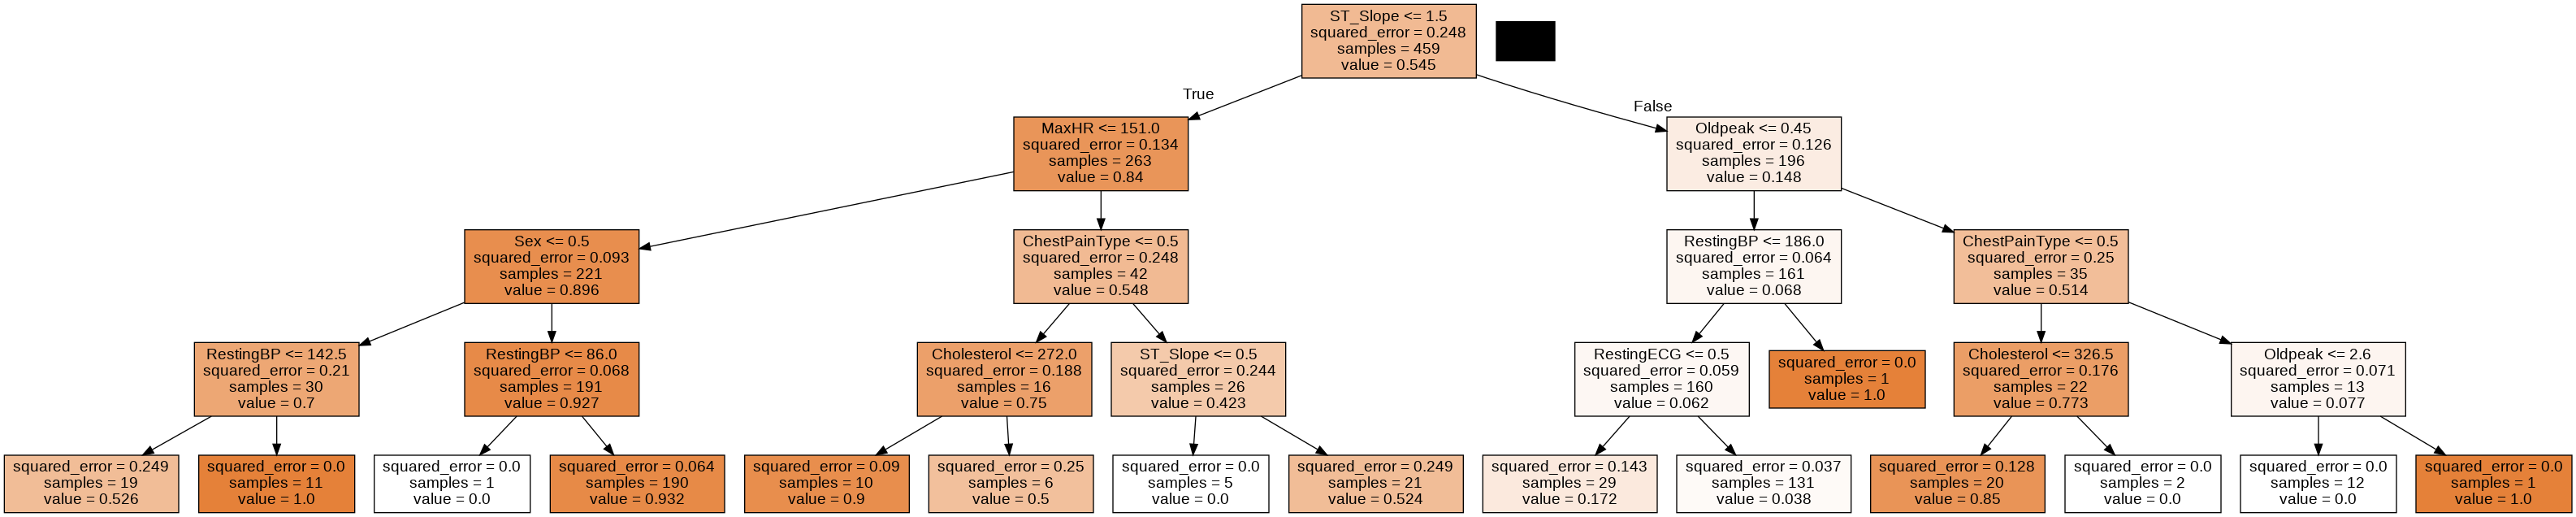

In [357]:
graph, = print_tree(regr2, features=X.columns)
Image(graph.create_png())

In [ ]:
#plt.scatter(pred, y_test, label='HeartDisease')
#plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
#plt.xlabel('pred')
#plt.ylabel('y_test')

In [ ]:
#mean_squared_error(y_test, pred)

# Bagging

In [216]:
X.shape

(918, 10)

In [217]:
# Bagging: using all features
rf = RandomForestRegressor(max_features='sqrt', random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=1)

Text(0, 0.5, 'y_test')

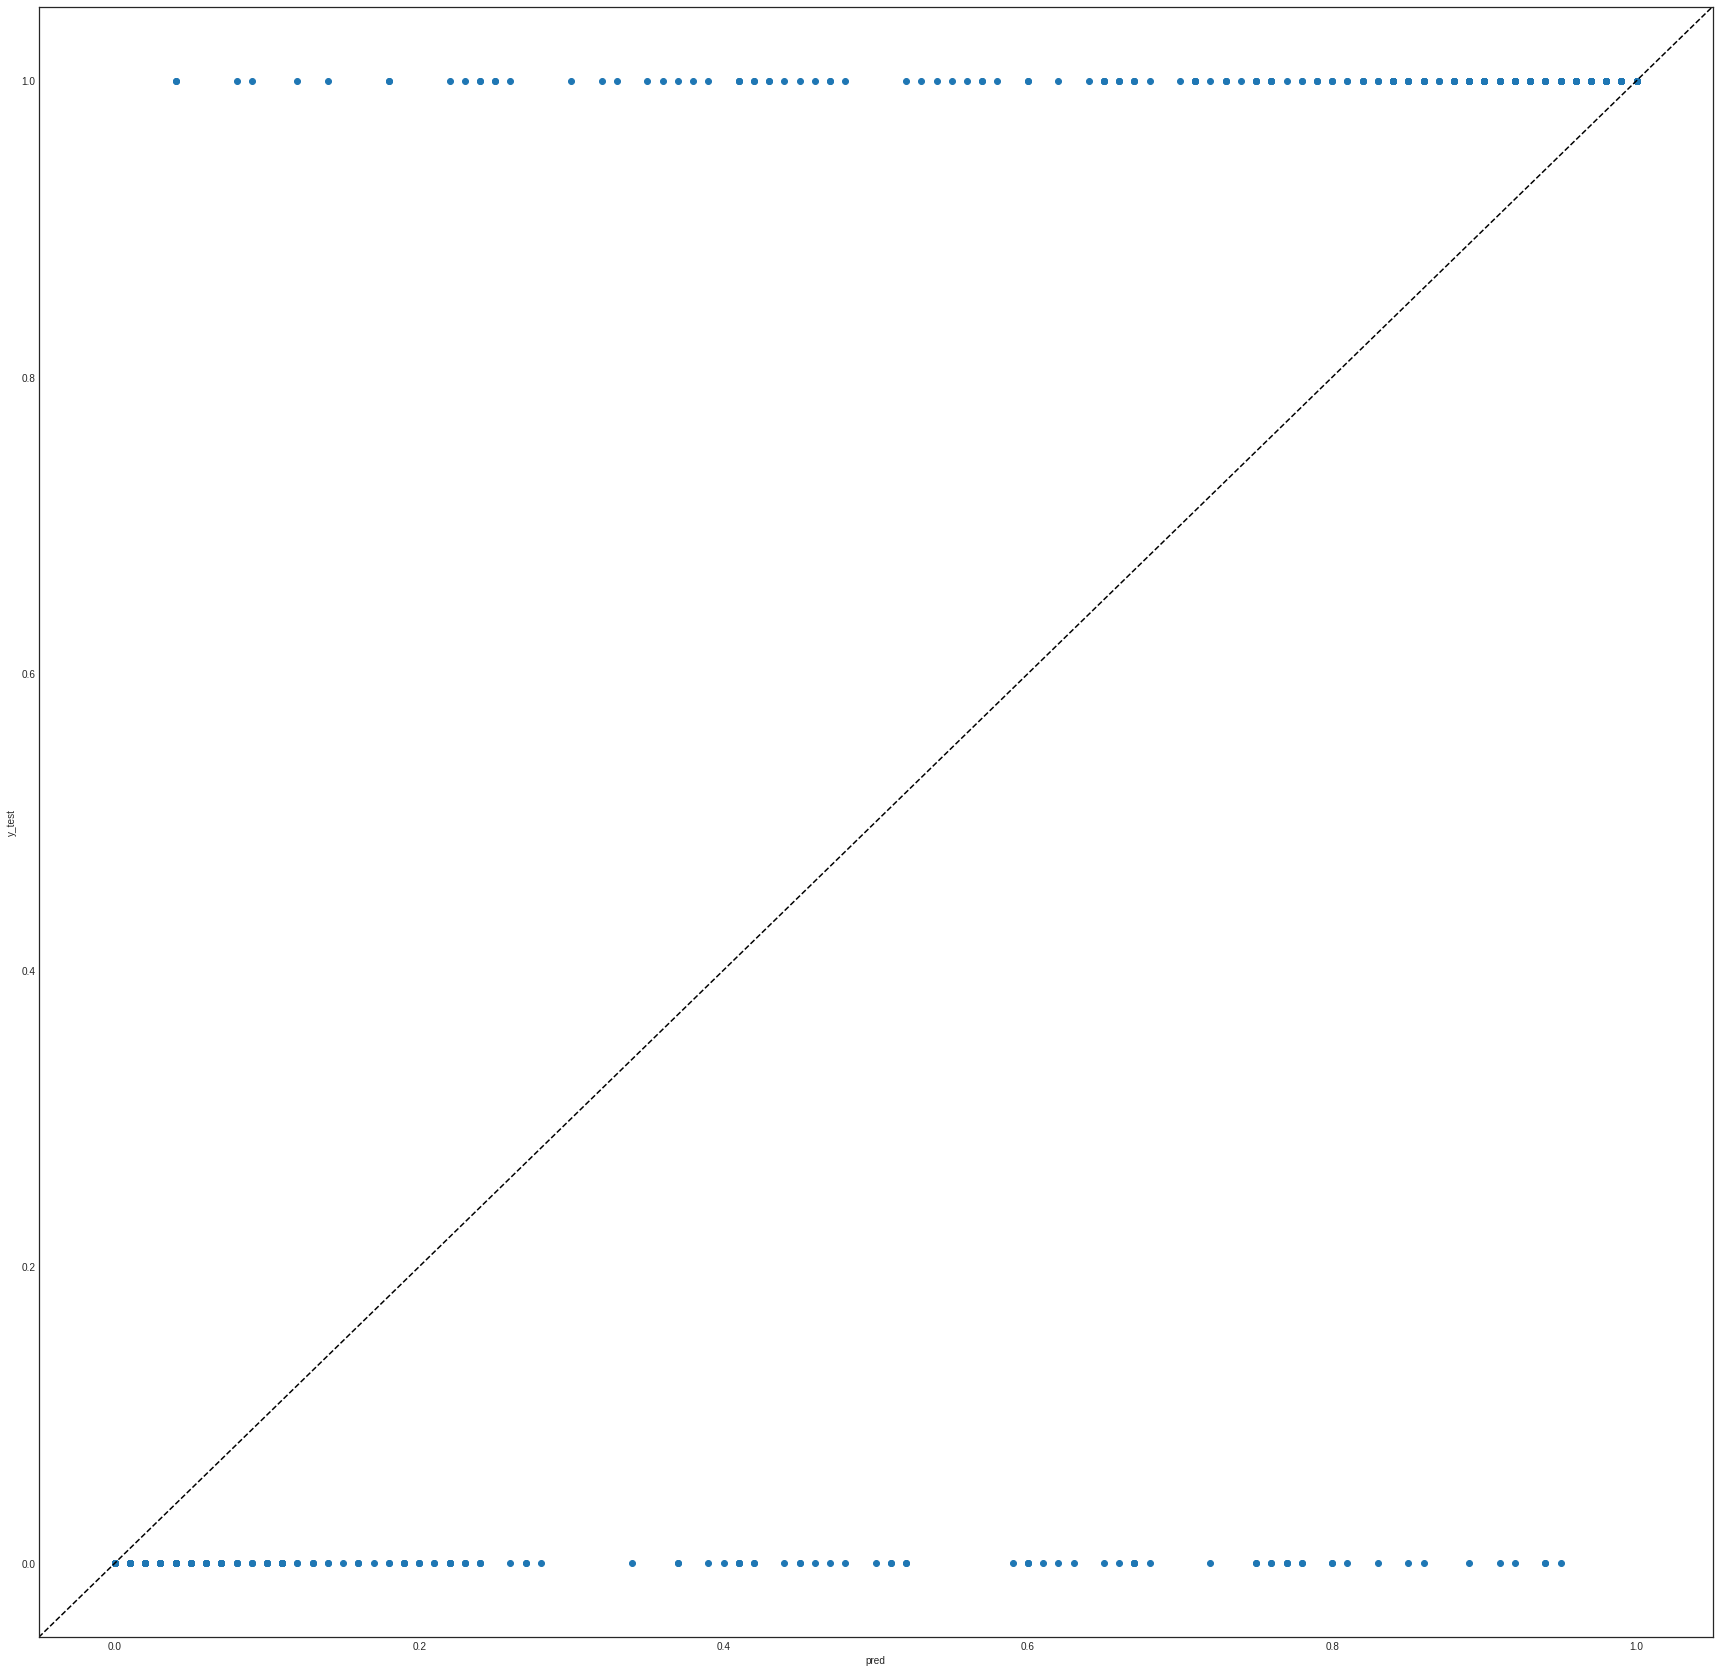

In [218]:
pred = rf.predict(X_test)
#pred_prob=rf.predict_proba(test)[:, 1]

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [219]:
mean_squared_error(y_test, pred)

0.11202745098039216

#Random Forest

In [220]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [221]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

0.11571851851851853

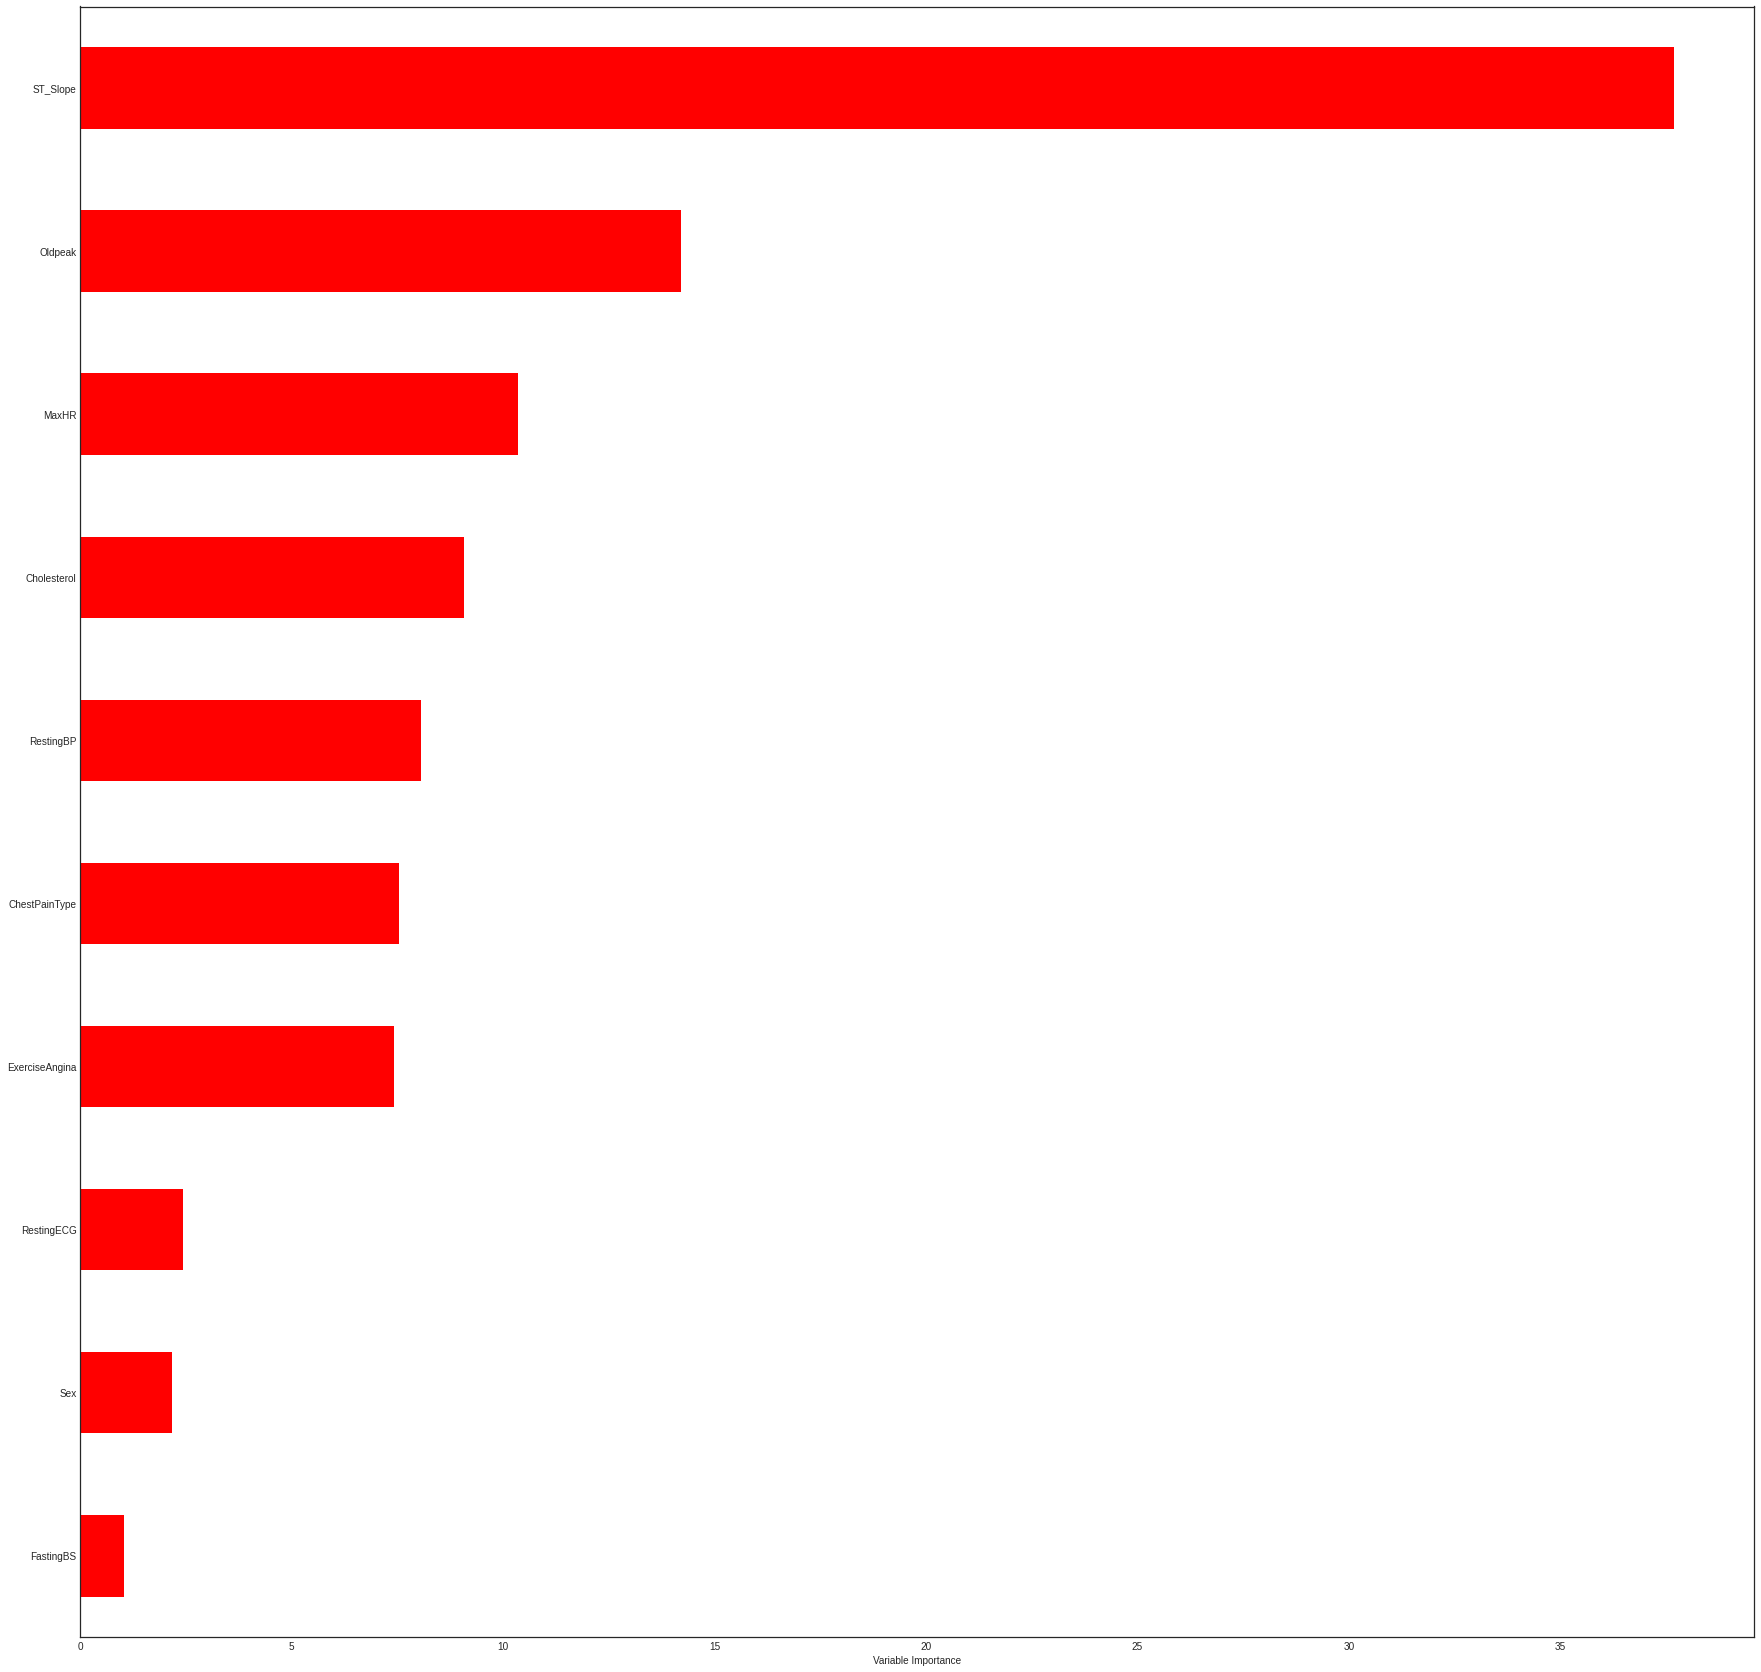

In [222]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [223]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 4], 'bootstrap': [True, False]}


In [224]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 410, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py", line 156, in _validate_estimator
    if self.estimator is not None and (
AttributeError: 'RandomForestRegressor' ob

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=42, verbose=2)

In [225]:
rf_random.best_params_

{'n_estimators': 775,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': False}

In [226]:
best_random = rf_random.best_estimator_
#grid_accuracy = evaluate(best_grid, X_test, y_test)
pred = best_random.predict(X_test)
mean_squared_error(y_test, pred)
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

0.14911269751659634

# Accuracy Scores

# KNN

In [227]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

In [228]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.54 %


# Decision Tree

In [241]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [243]:
print(Y_pred_dt.shape)

(459,)


# Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)


In [230]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")


The accuracy score achieved using Decision Tree is: 85.62 %


XGBoost

In [231]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

Y_pred_xgb = xgb_model.predict(X_test)


In [232]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 84.75 %


# Final Scores

In [248]:
scores = [score_knn,score_dt,score_rf,score_xgb]
algorithms = ["K-Nearest Neighbors", "Decision Tree", "Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using K-Nearest Neighbors is: 67.54 %
The accuracy score achieved using Decision Tree is: 82.79 %
The accuracy score achieved using Random Forest is: 85.62 %
The accuracy score achieved using XGBoost is: 84.75 %


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


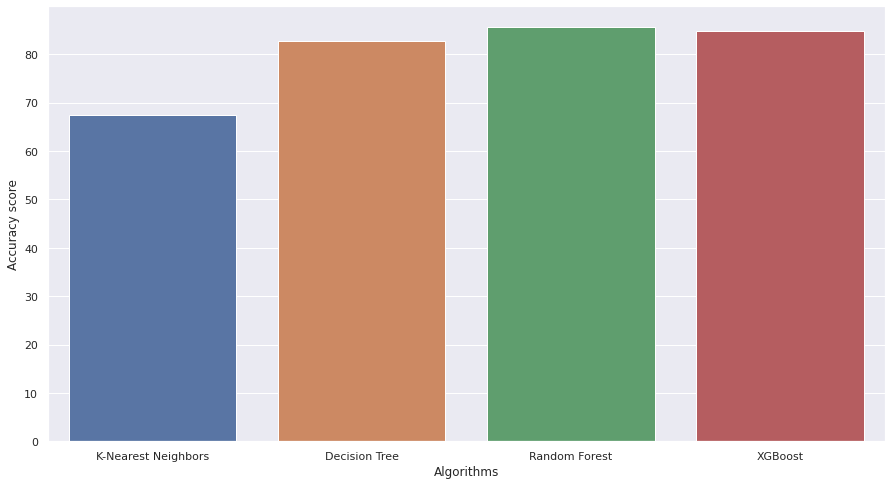

In [249]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)